In [11]:
import numpy as np
import pandas as pd
import matplotlib_inline as plt
import geopandas as gpd

In [12]:
df = pd.read_csv("~/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Singapore/prateek_bansal_meeting/code/data/case_sgp_sim_trip.csv")
gdf = gpd.read_file("~/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Singapore/prateek_bansal_meeting/code/data/data_sgp_subzone.shp")


  SUBZONE_C                                           geometry
0    OTSZ02  POLYGON ((103.84319 1.28433, 103.84335 1.2842,...
1    BMSZ02  POLYGON ((103.82209 1.28049, 103.8221 1.28011,...
2    OTSZ03  POLYGON ((103.84375 1.28508, 103.844 1.28491, ...
3    DTSZ04  POLYGON ((103.84962 1.28412, 103.84955 1.28391...
4    DTSZ05  POLYGON ((103.85253 1.28617, 103.85253 1.28615...


<Axes: >

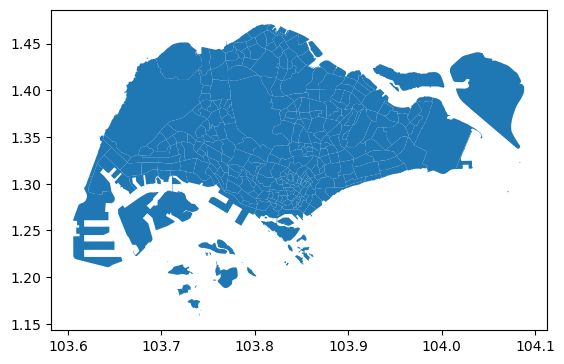

In [9]:
print(gdf.head())
gdf.plot()

## Columns of the dataset

In [35]:
df.head()

,AGE,GENDER,TRIP_PURPOSE,TRAVEL_MODE,ORIGIN_SUBZONE,DESTINATION_SUBZONE,TRIP_STARTTIME,COUNT
0,4,1,1,0,AMSZ01,AMSZ01,7,3.0
1,4,1,1,0,AMSZ02,AMSZ01,7,12.0
2,4,1,1,0,AMSZ02,AMSZ01,8,9.0
3,4,1,1,0,AMSZ03,AMSZ01,7,20.0
4,4,1,1,0,AMSZ03,AMSZ01,8,16.0


# characteristics of the datasets

- Age 
    - **0**: age 0-9
    - **1**: age 10-19
    - **2**: age 20-29
    - **3**: age 30-39
    - **4**: age 40-49
    - **5**: age 50-59
    - **6**: age 60-69
    - **7**: age 70-79
- Gender 
    - **0**: Male
    - **1**: Female 
- Trip_purpose  
    - **0**: Home
    - **1**: Work
    - **2**: Dining/Refreshment
    - **3**: Shopping
    - **4**: Education
    - **5**: Other
- Travel mode 
    - **0**: Driving
    - **1**: MRT
    - **2**: Bus
    - **3**: Walking
    - **4**: Taxi

- Origin_subzone 
    - Geometry of the subzone can be found in the shape file
- Destination subzone 
    - Geometry of the subzone can be found in the shape file- 
- Trip_starttime 
    - Departure time, e.g. 7 means that people depart at any time between 7.00am to 7.59am 
- Count - Absolute number of people (Assuming they are only citizen)


## Other datasets (stored in the oter dataset folder)

- **Singapore_ Subdivision (Planning Areas and Subzones) - Population Statistics, Charts and Map**
[link](https://www.citypopulation.de/en/singapore/admin/)
- **Singapore pop_2015**
[link](https://www.singstat.gov.sg/find-data/search-by-theme/population/geographic-distribution/latest-data)

## API for singapore resident population

In [ ]:
import requests
          
dataset_id = "d_e7ae90176a68945837ad67892b898466"
url = "https://data.gov.sg/api/action/datastore_search?resource_id="  + dataset_id 
        
response = requests.get(url)
print(response.json())

In [13]:
df.head()

,AGE,GENDER,TRIP_PURPOSE,TRAVEL_MODE,ORIGIN_SUBZONE,DESTINATION_SUBZONE,TRIP_STARTTIME,COUNT
0,4,1,1,0,AMSZ01,AMSZ01,7,3.0
1,4,1,1,0,AMSZ02,AMSZ01,7,12.0
2,4,1,1,0,AMSZ02,AMSZ01,8,9.0
3,4,1,1,0,AMSZ03,AMSZ01,7,20.0
4,4,1,1,0,AMSZ03,AMSZ01,8,16.0


In [27]:
outflow = df[(df.TRIP_PURPOSE != 0) & (df.ORIGIN_SUBZONE == "AMSZ02")]
inflow = df[(df.TRIP_PURPOSE == 0) & (df.DESTINATION_SUBZONE == "AMSZ02")]
print(outflow.COUNT.sum())
print(inflow.COUNT.sum())

54362.0
78336.0


In [26]:
pd.unique(inflow.TRIP_PURPOSE)

array([0])

## Hourly mobility matrix 

In [21]:
# Only for 7-8

df_7 = df[df.TRIP_STARTTIME == 7]

In [27]:
df_origin = df[df.ORIGIN_SUBZONE == "AMSZ01"]

In [37]:
pd.unique(df[df.ORIGIN_SUBZONE.str.startswith("M")].ORIGIN_SUBZONE)

array(['MPSZ01', 'MUSZ01', 'MUSZ02', 'MUSZ03', 'MDSZ02', 'MDSZ03',
       'MDSZ01', 'MESZ01', 'MPSZ02', 'MPSZ03', 'MSSZ01', 'MPSZ05',
       'MPSZ04'], dtype=object)

In [34]:
df_origin.groupby("TRIP_STARTTIME").agg({"COUNT":"sum"}).reset_index()

,TRIP_STARTTIME,COUNT
0,0,322.0
1,1,33.0
2,2,12.0
3,3,7.0
4,4,2.0
5,5,160.0
6,6,1230.0
7,7,1961.0
8,8,1877.0
9,9,2113.0


In [1]:
import requests
          
dataset_id = "d_49fc1d59dd39726b5fe3ad7f0f4f220e"
url = "https://api-open.data.gov.sg/v1/public/api/datasets/" + dataset_id + "/poll-download"
        
response = requests.get(url)
json_data = response.json()
if json_data['code'] != 0:
    print(json_data['errMsg'])
    exit(1)

url = json_data['data']['url']
response = requests.get(url)

In [4]:
response.headers["Content-Type"]

'application/zip'

In [21]:
def maxProfit(prices) :



    if len(prices) == 1:
        return 0
    if len(prices) == 2:
        return max(0,prices[1]-prices[0])
        
    profit = []
    for buy_index in range(0,len(prices)-1): #buy_index = 3
        print(buy_index)
        sell = prices[(buy_index+1):] #sell = [6,4] 
            
        profit.append(max([x - prices[buy_index] for x in sell]))
    profit.append(0)
    return max(profit)


In [50]:
n=11
n_char = np.array([char for char in bin(n)[2:]])
n_char

array(['1', '0', '1', '1'], dtype='<U1')

In [28]:
for i in range(len(a)):
    print(a[i])

1
0
1
1


In [42]:
b = np.array([char for char in a])

In [57]:

n=5
one = []
for i in range(n+1):
    n_char = np.array([char for char in bin(i)[2:]])
    one.append(sum(n_char == "1"))
one

[0, 1, 1, 2, 1, 2]